# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Robert**
+ **Last Name: Chandler**
+ **Email: chandl71@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): No**
+ **Which generative AI tool did you use (if applicable)?: N/A**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information $I$ is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.  
**Answer:**  
The probability that the patient has tuberculosis is simply the frequency with which tuberculosis occurs in the population. That is, $$p(B|I) = 0.004$$

---

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.  
**Answer:**  
$p(A|B,I)$ is simply another way to write the first bullet point in our prior information above:  

> If a tested patient has the disease, then 80% of the time the test comes out positive

We can rearrange the order of this sentence and replace it with our logical sentences $A$ and $B$:

> The probability that a test comes out positive ($A$) given that the tested patient has the disease ($B$) is 80% ($p = 0.8$)

so $$p(A|B,I) = 0.8$$

---

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.  
**Answer:**  
$p(A|\neg B, I)$ is the similar to the second bullet in our prior information above. We can rewrite the original statement to read:

> The probability that the test is negative given that the tested patient does not have the disease is 0.9.

This is equivalent to $p(\neg A|\neg B,I)$. From the obvious rule, this can be rewritten as:

> The probability that the test is *positive* given that the tested patient does not have the disease is $1 - 0.9 = 0.1$.

Which can be written logically as $$p(A|\neg B,I) = 0.1$$

---


D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.  
**Answer:**  
$p(B|A,I) = \frac{p(A,B|I)}{p(A|I)}$ from the product rule... we can find the numerator using the producet rule and $p(A|I)$ can be found from the sum rule where our series of mutually exclusive events is $B, \neg B$:  
$p(A|I) = p(A,B|I) + p(A,\neg B|I) = p(A|B,I)p(B|I) + p(A|\neg B,I)p(\neg B|I)$

We already calculated all of these terms except for $p(\neg B|I)$, but that can easily be found from the obvious rule to be $1 - 0.004 = 0.996$, so:
$p(A|I) = 0.8*0.004+0.1*0.996 = 0.1028$, which we can substitute back into the equation we began with:

$p(B|A,I) = \frac{p(A,B|I)}{p(A|I)} = \frac{0.8*0.004}{0.1028} \approx 0.0311$

$$p(B|A,I) \approx 0.0311$$

---

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**
 $p(B|\neg A,I) = \frac{p(\neg A,B|I)}{p(\neg A|I)} = \frac{p(\neg A|B,I)p(B|I)}{p(\neg A)|I}=\frac{(1-0.8)(0.004)}{(1-0.1028)} \approx 0.000892$

 $$p(B|\neg A,I) \approx 0.000892$$

 The test does change our prior state of knowledge about the patient. The test is useful in the sense that if a patient tests negative, we have very high confidence that they do not have tuberculosis... however, if the patient tests positive, we cannot say with high confidence that they actually have the disease. This means that we would expect to see a significant number of false positives, which we could combat by administering multiple tests if a patient did happen to test positive.

 ---

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis.  
**Answer:**  
Using our previous answers:  

$p(B|A,I) = \frac{p(A,B|I)}{p(A|I)} = \frac{p(A|B,I)p(B|I)}{p(A|I)}=\frac{p(A|B,I)p(B|I)}{ p(A|B,I)p(B|I) + p(A|\neg B,I)p(\neg B|I)}$

Since $p(B)$ cannot be changed, we want to make $p(A|\neg B,I)$ as small as we can *relative* to $p(A|B,I)$. In other words, we want our probability of true positives to be much greater than our probability of false positives, which would be a good "common sense" definition of a good test. One example that would give us our desired value is:  
$$p(A|B, I) := 0.3$$ $$p(A|\neg B, I) := 0.00001$$

this yields:

$p(B|A,I) = \frac{0.3*0.004}{ 0.3*0.004 + 0.00001*0.996} \approx 0.992$

Our probability of false positive being low matters much more than our probability of true positive being high in this case, since such a large percentage of the population does not have the disease.

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

In [2]:
values_probabilities = {
    0: 0.3,
    1: 0.1,
    2: 0.2,
    3: 0.4
}
values = list(values_probabilities.keys())
probabilities = list(values_probabilities.values())
X = scipy.stats.rv_discrete(values=(values, probabilities))

A. The expectation $\mathbb{E}[X]$.

**Answer:**

In [3]:
X.expect()

1.7000000000000002

B. The variance $\mathbb{V}[X]$.

**Answer:**

In [4]:
X.var()

1.6099999999999994

C. Plot the probability mass function of $X$.

<BarContainer object of 4 artists>

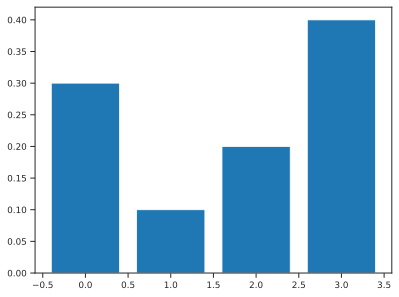

In [5]:
plt.bar(values, probabilities)

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**

In [6]:
values_probabilities[0] + values_probabilities[2]

0.5

E. Find $\mathbb{E}[4X + 3]$.

**Answer:**  
$\mathbb{E}[4X + 3] = 4\mathbb{E}[X] + 3$

In [7]:
4 * X.expect() + 3

9.8

Check this answer against the actual expected value of the modified distribution:

In [8]:
X_modified = scipy.stats.rv_discrete(values=([i * 4 + 3 for i in values], probabilities))
X_modified.expect()

9.8

F. Find $\mathbb{V}[4X+3]$.

**Answer:**  
$\mathbb{V}[4X+3] = 4^2*\mathbb{V}[X] + 0$

In [9]:
4 ** 2 * X.var()

25.75999999999999

Check this answer against the actual expected value of the modified distribution:

In [10]:
X_modified.var()

25.75999999999999

## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of orange and red colors in each decade). We have done this for you.

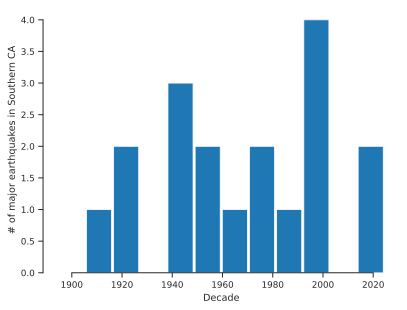

In [11]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
# plt.legend(loc="best", frameon=False) # No labels to include in legend...
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [12]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [13]:
X = scipy.stats.poisson(r)

A. Plot the probability mass function of ``X``.

<BarContainer object of 10 artists>

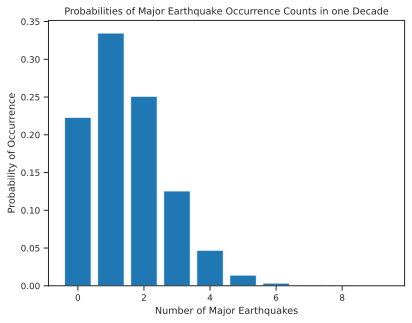

In [14]:
fig, ax = plt.subplots()
ax.set_title("Probabilities of Major Earthquake Occurrence Counts in one Decade")
ax.set_xlabel("Number of Major Earthquakes")
ax.set_ylabel("Probability of Occurrence")
ax.bar(range(10), X.pmf(range(10)))

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
It is equal to the complement of the probability that zero earthquakes will occur in the next decade

In [15]:
1 - X.pmf(0)

0.7768698398515702

Check this against the (approximately) infinite sum of the pmf evaluated at values greater than or equal to 1:

In [16]:
X.pmf(np.linspace(1,10000,10000)).sum()

0.7768698398515702

C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
The Wikipedia page indicates that the sum of two independent Poisson distributions is equal to the Poisson distribution with an expected value ($r$) equal to the sum of the expected values of the two distributions, i.e.:  
If $X_1, X_2 \sim \operatorname{Poisson}(r_0)$ then $X_1 + X_2 = Y \sim \operatorname{Poisson}(2r_0)$

In [17]:
Y = scipy.stats.poisson(2*r)
1 - Y.pmf(0)

0.950212931632136

D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
Summing five identical Poisson distributions is equivalent to one distribution with $r = 5r_0$

In [18]:
Z = scipy.stats.poisson(5*r)
1 - Z.pmf(0)

0.9994469156298522

## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [19]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [20]:
fitted_params = scipy.stats.exponweib.fit(time_to_fail_data, loc=0)
T = scipy.stats.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

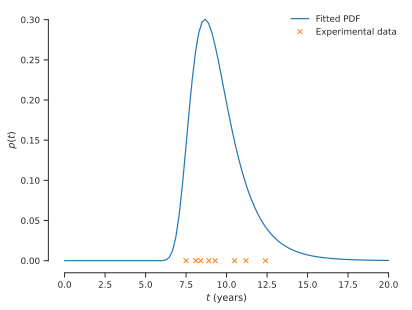

In [21]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [22]:
# Your code here
t_mean = T.mean()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = p(T\le t)$ of $T$.

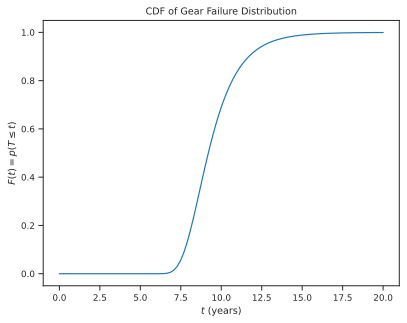

In [23]:
fig, ax = plt.subplots()
ax.set_title('CDF of Gear Failure Distribution')
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$F(t)=p(T \leq t)$')
ax.plot(ts, T.cdf(ts))

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.
$S(t)$ is simply the complement of $F(t)$: $S(t) = 1 - F(t)$

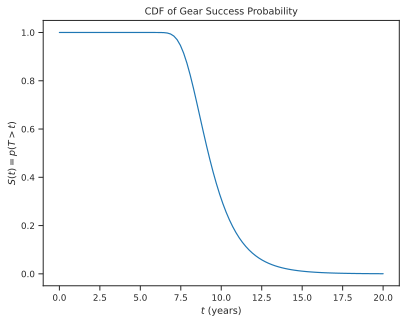

In [24]:
fig, ax = plt.subplots()
ax.set_title('CDF of Gear Success Probability')
ax.set_xlabel('$t$ (years)')
ax.set_ylabel('$S(t)=p(T > t)$')
ax.plot(ts, 1 - T.cdf(ts))

D. Find the probability that the gear lasts anywhere between 8 and 10 years.
This is the same as the probability that the gear fails at $8 < T < 10$, which is $\int_8^{10}{\operatorname{PDF}(T) dt} = \operatorname{CDF}(10) - \operatorname{CDF}(8)$ 

In [25]:
print(f"The probability the gear lasts between 8 and 10 years is {T.cdf(10) - T.cdf(8)}")

The probability the gear lasts between 8 and 10 years is 0.5342898192604528


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [26]:
tstar = T.ppf(0.01)
print(f"The probability of the gear failing in under {tstar} years is 0.01")

The probability of the gear failing in under 6.975009984185545 years is 0.01
